In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Scenario 1

In [34]:
def equations_1(y,t, m, k, w):
    x,v = y
    dxdt = v
    dvdt = -(k*x + w*v) / m
    return [dxdt, dvdt]

In [35]:
m = 1.0     # Mass (kg)
k = 10.0    # Spring constant (N/m)
w = 0.5     # Damping constant (Ns/m)
v0 = 5.0    # Initial velocity (m/s)

x0 = 0.0    # Initial displacement (m)
y0 = [x0, v0]   # Initial condition vector

t = np.linspace(0, 25, 1000) # Time vector


In [36]:
y = odeint(equations_1, y0, t, args=(m, k, w))

x= y[:,0]
v= y[:,1]

a = -(k*x + w*v) / m

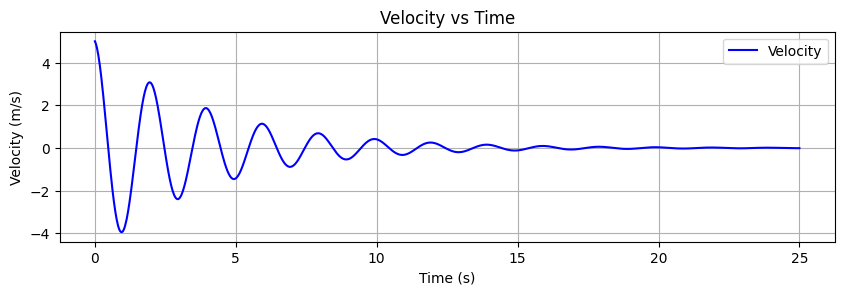

In [37]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, v, 'b-', label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

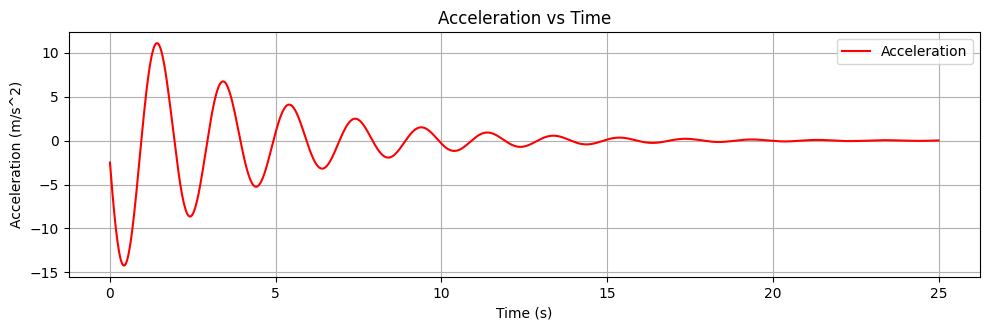

In [38]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, a, 'r-', label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Scenario 2

In [13]:
def model(y, t, mu, ms, ku, ks, cu, cs, g):
    xu, vu, xs, vs = y
    dxudt = vu
    dvudt = (-(ku*xu + ks*(xu - xs) + cu*vu) / mu) + g
    dxsdt = vs
    dvsdt = (-(ks*(xs - xu) + cs*vs) / ms) + g
    return [dxudt, dvudt, dxsdt, dvsdt]

In [63]:
mu = 50.0                        # Unsprung Mass (kg)
ms = 1500.0                      # Sprung Mass (kg)
ku = 200000.0                    # Spring constant for Unsprung Mass (N/m)
ks = 100000.0                    # Spring constant for Sprung Mass (N/m)
g = 9.81                         # Acceleration due to gravity (m/s^2)
cu = 850                         # Damping constant for Unsprung Mass (Ns/m)
cs = 130000                      # Damping constant for Sprung Mass (Ns/m)
v0_u = 5.0                       # Initial velocity for tyre (m/s)

xu_0 = 0.0                       # Initial displacement of unsprung mass (m)
vu_0 = v0_u                      # Initial velocity of unsprung mass (m/s)
xs_0 = 0.0                       # Initial displacement of sprung mass (m)
vs_0 = 0                         # Initial velocity of sprung mass (m/s)
y0 = [xu_0, vu_0, xs_0, vs_0]    # Initial condition vector

t = np.linspace(0, 5, 1000)    # Time vector

In [64]:
y = odeint(model, y0, t, args=(mu, ms, ku, ks, cu, cs, g))
xu_0 = y[:,0]
vu_0 = y[:,1]
xs_0 = y[:,2]
vs_0 = y[:,3]

a_u = (-(ku*xu_0 + ks*(xu_0 - xs_0) + cu*vu_0) / mu) + g
a_s = (-(ks*(xs_0 - xu_0) + cs*vs_0) / ms) + g

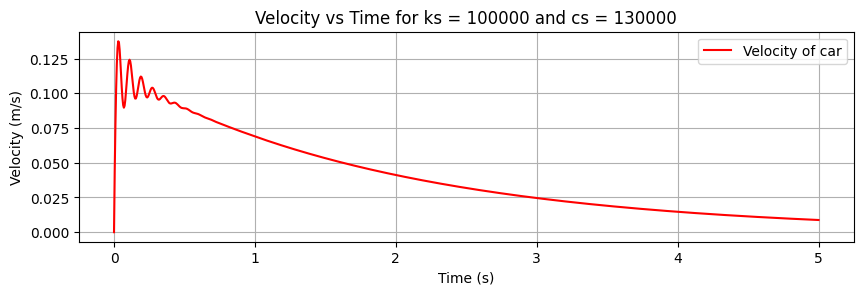

In [65]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, vs_0, 'r-', label='Velocity of car')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time for ks = 100000 and cs = 130000')
plt.grid(True)
plt.legend()

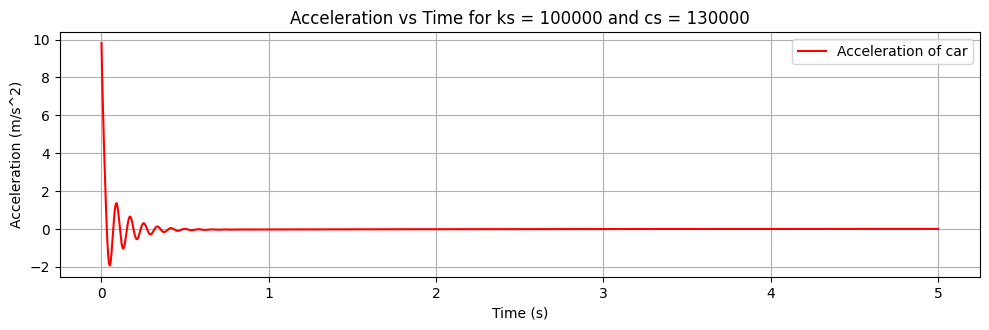

In [66]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(t, a_s, 'r-', label='Acceleration of car')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time for ks = 100000 and cs = 130000')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Scenario 3:
when k is a function of x or t

In [66]:
def equations_2(y,t, m, k0, w):
    x,v = y
    dxdt = v
    k = k0 * np.sin(x)
    dvdt = -(k*x + w*v) / m
    return [dxdt, dvdt]

In [67]:
m = 1.0     # Mass (kg)
k0 = 10.0    # Spring constant (N/m)
w = 0.5     # Damping constant (Ns/m)
v0 = 5.0    # Initial velocity (m/s)

x0 = 0.0    # Initial displacement (m)
y0 = [x0, v0]   # Initial condition vector

t = np.linspace(0, 25, 1000) # Time vector

In [68]:
y = odeint(equations_2, y0, t, args=(m, k0, w))

x= y[:,0]
v= y[:,1]
k = k0 * np.sin(x)

a = -(k*x + w*v) / m

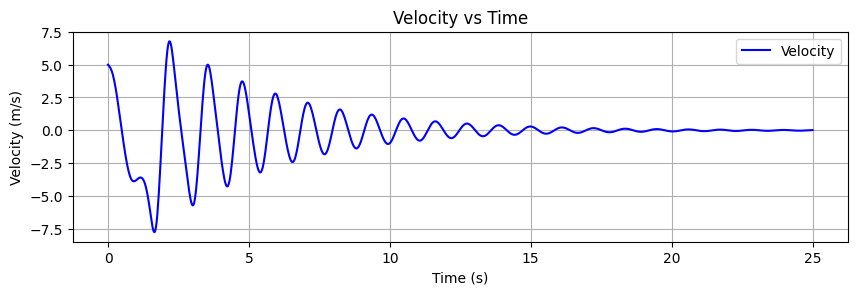

In [69]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, v, 'b-', label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()

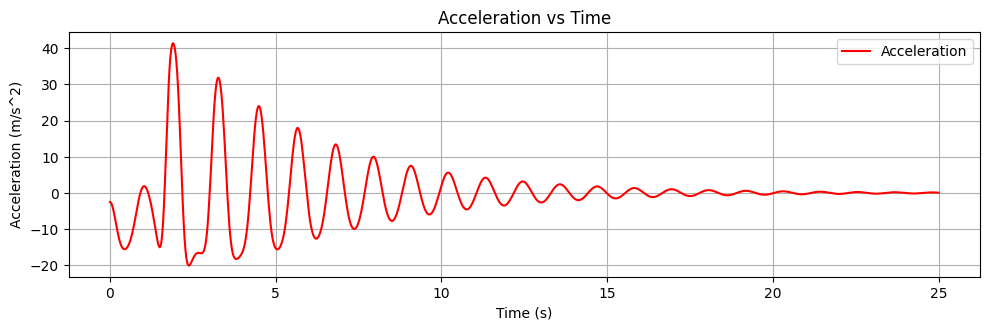

In [70]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, a, 'r-', label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()